In [18]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load player data
df_player_info = pd.read_csv("top5_leagues_player.csv")
df_player_info.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [3]:
# clean player data
df_player_info = df_player_info.drop(
    [
        "Unnamed: 0",
        "full_name",
        "nationality",
        "place_of_birth",
        "shirt_nr",
        "foot",
        "club",
        "contract_expires",
        "joined_club",
        "player_agent",
        "outfitter",
    ],
    axis=1,
)
df_player_info.head()

,name,age,height,price,max_price,position,league
0,Ederson,29,1.88,45.00,70.0,Goalkeeper,EPL
1,Stefan Ortega,30,1.85,6.00,6.0,Goalkeeper,EPL
2,Scott Carson,37,1.88,0.25,6.0,Goalkeeper,EPL
3,Rúben Dias,26,1.87,75.00,75.0,Defender - Centre-Back,EPL
4,Nathan Aké,28,1.80,35.00,40.0,Defender - Centre-Back,EPL


In [4]:
# load and clean more data
df_atmid_wingers = pd.read_csv("AtMid_Wingers.csv")
df_centerbacks = pd.read_csv("CenterBacks.csv")
df_forwards = pd.read_csv("Forwards.csv")
df_fullbacks = pd.read_csv("FullBacks.csv")
df_midfielders = pd.read_csv("Midfielders.csv")
df_name_db = pd.read_csv("NAME_DB.csv")

df_merged = pd.concat(
    [
        df_atmid_wingers,
        df_centerbacks,
        df_forwards,
        df_fullbacks,
        df_midfielders,
        df_name_db,
    ],
    ignore_index=True,
)
df_merged = df_merged.drop(["Unnamed: 0", "Links"], axis=1)
df_merged = df_merged.rename(
    columns={
        "Name": "name",
        "Attribute Vector": "attribute-vector",
        "Percentiles": "percentiles",
    }
)

# remove players with missing data (attribute-vector & percentiles = nan)
df_merged = df_merged.dropna(axis=0, thresh=2)

df_merged

,name,attribute-vector,percentiles
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,..."
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4..."
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8..."
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7..."
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,..."
...,...,...,...
1836,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12..."
1837,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1838,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1839,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8..."


In [5]:
# get attribute names
non_gk_names = [
    "Non-Penalty Goals",
    "Non-Penalty xG",
    "Shots Total",
    "Assists",
    "xAG",
    "npxG + xAG",
    "Shot-Creating Actions",
    "Passes Attempted",
    "Pass Completion %",
    "Progressive Passes",
    "Progressive Carries",
    "Successful Take-Ons",
    "Touches (Att Pen)",
    "Progressive Passes Rec",
    "Tackles",
    "Interceptions",
    "Blocks",
    "Clearances",
    "Aerials won",
]

# add attributes as columns
for col in non_gk_names:
    df_merged.insert(len(df_merged.columns), col.lower().replace(" ", "-"), np.nan)

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# load data into new attributes
for row in df_merged.index:
    vectors = df_merged["attribute-vector"][row]
    # cover nan
    if type(vectors) == float:
        continue

    # remove leading/trailing '[' and ']' and split
    vector_strs = vectors[1:-1].split(", ")
    for col in range(len(vector_strs)):
        df_merged.iat[row, col+3] = float(vector_strs[col])

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,3.26,1.63,1.29,2.73,5.73,1.71,0.19,1.63,0.23,0.30
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,2.62,3.64,1.53,5.46,10.04,1.20,0.80,0.66,0.84,0.44
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,2.86,3.68,2.25,4.44,8.27,0.87,0.46,1.07,0.20,0.56
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,3.13,3.08,1.96,4.40,9.20,1.37,0.39,1.86,0.44,1.96
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,2.68,0.82,0.35,1.63,4.96,0.70,0.41,0.82,0.53,0.58


In [7]:
# merge player info and merged data
df_final = pd.merge(df_merged, df_player_info, on="name", how="left")

# remove duplicates and goalkeepers (only using non-gk players)
df_final = df_final.drop_duplicates()
df_final.drop(df_final[df_final["position"] == "Goalkeeper"].index, inplace=True)

df_final

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,interceptions,blocks,clearances,aerials-won,age,height,price,max_price,position,league
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,0.19,1.63,0.23,0.30,22.0,1.77,30.0,30.0,midfield - Attacking Midfield,Other
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,0.80,0.66,0.84,0.44,23.0,1.79,7.0,7.0,Attack - Right Winger,Ligue1
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,0.46,1.07,0.20,0.56,21.0,1.80,35.0,35.0,Attack - Left Winger,Bundesliga
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,0.39,1.86,0.44,1.96,23.0,1.74,15.0,15.0,Attack - Left Winger,Bundesliga
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,0.41,0.82,0.53,0.58,26.0,1.83,3.5,5.5,midfield - Central Midfield,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,Piotr Zieliński,"[0.15, 0.16, 2.08, 0.31, 0.29, 0.46, 5.45, 59....","[80, 87, 93, 99, 99, 99, 99, 78, 59, 52, 82, 6...",0.15,0.16,2.08,0.31,0.29,0.46,5.45,...,0.56,0.59,0.34,0.15,NaN,NaN,NaN,NaN,NaN,NaN
1843,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12...",0.03,0.05,0.36,0.08,0.05,0.10,1.48,...,1.27,1.27,1.59,1.72,24.0,1.81,40.0,40.0,midfield - Defensive Midfield,LaLiga
1844,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57...",0.00,0.14,1.76,0.20,0.00,0.14,1.18,...,0.78,1.76,1.18,1.37,NaN,NaN,NaN,NaN,NaN,NaN
1846,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8...",0.40,0.27,2.56,0.19,0.26,0.53,4.81,...,0.21,0.56,0.32,0.35,24.0,1.78,80.0,80.0,midfield - Attacking Midfield,EPL



## Key Metrics For Positions

To evaluate the importance of each attribute for specific football positions, let's break down which metrics are particularly crucial for attacking midfielders, centre backs, fullbacks, midfielders, defensive midfielders, wingers, and strikers. These metrics help in understanding the players' contribution to the team beyond traditional stats.

### Attacking Midfielders
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions
4. Passes Attempted & Pass Completion %
5. Progressive Passes & Progressive Carries
6. Touches (Att Pen)

### Centre Backs
1. Tackles, Interceptions,Blocks, Clearances
2. Aerials won
3. Passes Attempted & Pass Completion %
4. Progressive Passes

### Fullbacks
1. Assists & xAG
2. Progressive Passes & Progressive Carries
3. Successful Take-Ons
4. Tackles, Interceptions, Blocks

### Midfielders (Central/Box-to-Box)
1. Passes Attempted & Pass Completion %, Progressive Passes
2. Shot-Creating Actions
3. Tackles & Interceptions
4. Progressive Carries & Successful Take-Ons

### Defensive Midfielders
1. Tackles, Interceptions, Blocks
2. Passes Attempted & Pass Completion %
3. Progressive Passes
4. Aerials won

### Wingers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions & Progressive Carries
4. Successful Take-Ons & Touches (Att Pen)

### Strikers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shots Total
4. Touches (Att Pen)
5. Aerials won

In [8]:
df_final


,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,interceptions,blocks,clearances,aerials-won,age,height,price,max_price,position,league
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,0.19,1.63,0.23,0.30,22.0,1.77,30.0,30.0,midfield - Attacking Midfield,Other
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,0.80,0.66,0.84,0.44,23.0,1.79,7.0,7.0,Attack - Right Winger,Ligue1
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,0.46,1.07,0.20,0.56,21.0,1.80,35.0,35.0,Attack - Left Winger,Bundesliga
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,0.39,1.86,0.44,1.96,23.0,1.74,15.0,15.0,Attack - Left Winger,Bundesliga
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,0.41,0.82,0.53,0.58,26.0,1.83,3.5,5.5,midfield - Central Midfield,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,Piotr Zieliński,"[0.15, 0.16, 2.08, 0.31, 0.29, 0.46, 5.45, 59....","[80, 87, 93, 99, 99, 99, 99, 78, 59, 52, 82, 6...",0.15,0.16,2.08,0.31,0.29,0.46,5.45,...,0.56,0.59,0.34,0.15,NaN,NaN,NaN,NaN,NaN,NaN
1843,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12...",0.03,0.05,0.36,0.08,0.05,0.10,1.48,...,1.27,1.27,1.59,1.72,24.0,1.81,40.0,40.0,midfield - Defensive Midfield,LaLiga
1844,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57...",0.00,0.14,1.76,0.20,0.00,0.14,1.18,...,0.78,1.76,1.18,1.37,NaN,NaN,NaN,NaN,NaN,NaN
1846,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8...",0.40,0.27,2.56,0.19,0.26,0.53,4.81,...,0.21,0.56,0.32,0.35,24.0,1.78,80.0,80.0,midfield - Attacking Midfield,EPL


In [23]:
print(df_final.columns)

Index(['name', 'attribute-vector', 'percentiles', 'non-penalty-goals',
       'non-penalty-xg', 'shots-total', 'assists', 'xag', 'npxg-+-xag',
       'shot-creating-actions', 'passes-attempted', 'pass-completion-%',
       'progressive-passes', 'progressive-carries', 'successful-take-ons',
       'touches-(att-pen)', 'progressive-passes-rec', 'tackles',
       'interceptions', 'blocks', 'clearances', 'aerials-won', 'age', 'height',
       'price', 'max_price', 'position', 'league'],
      dtype='object')


In [127]:
df_final['position'] = df_final['position'].str.replace('midfield - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Attack - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Defender - ', '', regex=False)


In [128]:
df_amc = df_final[df_final['position'] == 'Attacking Midfield']


In [129]:
# Selected important columns for "Attacking Midfielders"
amc_columns = [
    'name','age', 'non-penalty-goals', 'non-penalty-xg', 'assists',
    'xag', 'shot-creating-actions', 'passes-attempted',
    'pass-completion-%', 'progressive-passes', 'successful-take-ons',
    'tackles', 'interceptions', 'league','position','price','progressive-carries'
]

# Filtering for "Attacking Midfielder" players and selecting the 13 important columns
df_amc = df_amc[amc_columns]


In [130]:
df_amc

,name,age,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,progressive-passes,successful-take-ons,tackles,interceptions,league,position,price,progressive-carries
0,Brenden Aaronson,22.0,0.04,0.15,0.11,0.16,3.60,30.24,74.3,3.26,1.29,1.71,0.19,Other,Attacking Midfield,30.0,1.63
12,Joe Aribo,26.0,0.15,0.11,0.00,0.06,1.99,28.31,72.7,2.87,1.25,2.28,0.74,EPL,Attacking Midfield,15.0,1.40
18,Nedim Bajrami,24.0,0.10,0.16,0.05,0.13,3.74,35.97,71.8,3.74,1.48,1.02,0.72,SerieA,Attacking Midfield,8.0,2.30
20,Tommaso Baldanzi,20.0,0.20,0.12,0.00,0.09,3.05,32.86,82.5,3.50,1.17,1.27,0.10,Other,Attacking Midfield,10.0,2.90
33,Ludovic Blas,25.0,0.21,0.20,0.21,0.19,4.08,37.90,78.3,4.64,2.79,1.32,0.59,Ligue1,Attacking Midfield,18.0,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,David Silva,37.0,0.12,0.16,0.20,0.15,3.82,55.88,84.8,7.52,0.94,1.61,0.71,LaLiga,Attacking Midfield,4.0,3.31
1782,Kevin Stöger,29.0,0.07,0.07,0.10,0.20,4.78,55.65,69.3,7.41,0.76,2.91,0.90,Bundesliga,Attacking Midfield,2.5,1.49
1783,Denis Suárez,29.0,0.00,0.05,0.00,0.10,3.24,43.05,73.2,4.10,1.81,2.48,0.48,LaLiga,Attacking Midfield,5.0,2.48
1796,Kristian Thorstvedt,24.0,0.16,0.17,0.08,0.09,2.22,38.66,76.2,4.75,0.55,1.27,1.11,SerieA,Attacking Midfield,8.5,2.46


In [131]:

important_columns_cb = [
    'name', 'tackles', 'interceptions', 'blocks', 'clearances',
    'aerials-won', 'passes-attempted', 'pass-completion-%', 'league','max_price'
]

important_columns_fb = [
    'name', 'assists', 'progressive-passes', 'successful-take-ons', 
    'tackles', 'interceptions', 'league','max_price'
]

important_columns_dm = [
    'name', 'tackles', 'interceptions', 'blocks', 'passes-attempted', 
    'pass-completion-%', 'progressive-passes','progressive-carries' , 'aerials-won', 'league','max_price'
]

important_columns_wg = [
    'name', 'non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 
    'successful-take-ons', 'shot-creating-actions', 'touches-(att-pen)', 'league','max_price'
]

important_columns_st = [
    'name', 'non-penalty-goals', 'non-penalty-xg', 'shots-total', 'assists', 
    'xag', 'touches-(att-pen)', 'aerials-won', 'league','max_price'
]

important_columns_cm = [
    'name', 'passes-attempted', 'pass-completion-%', 'progressive-passes',
    'tackles', 'interceptions', 'shot-creating-actions', 'league','max_price'
]

important_columns_rm_lm = [
    'name', 'assists', 'successful-take-ons', 'tackles', 'interceptions',
    'passes-attempted', 'progressive-passes', 'shot-creating-actions', 'league','max_price'
]

df_cb = df_final[df_final['position'] == 'Centre-Back']
df_rb = df_final[df_final['position'] == 'Right-Back']
df_lb = df_final[df_final['position'] == 'Left-Back']
df_rm = df_final[df_final['position'] == 'Right Midfield']
df_lm = df_final[df_final['position'] == 'Left Midfield']
df_cf = df_final[df_final['position'] == 'Centre-Forward']
df_ss = df_final[df_final['position'] == 'Second Striker']
df_rw = df_final[df_final['position'] == 'Right Winger']
df_lw = df_final[df_final['position'] == 'Left Winger']
df_dm = df_final[df_final['position'] == 'Defensive Midfield']
df_cm = df_final[df_final['position'] == 'Central Midfield']

df_cm = df_cm[important_columns_cm]
df_dm = df_dm[important_columns_dm]
df_lw = df_lw[important_columns_wg]
df_rw = df_rw[important_columns_wg]
df_ss = df_ss[important_columns_st]
df_cf = df_cf[important_columns_st]
df_lm = df_lm[important_columns_rm_lm]
df_rm = df_rm[important_columns_rm_lm]
df_rb = df_rb[important_columns_fb]
df_lb = df_lb[important_columns_fb]
df_cb = df_cb[important_columns_cb]

 # Discovering and Visualizing Data

## Attacking Midfielder - - Data Discovery

In [136]:
from sklearn.preprocessing import StandardScaler
import numpy as np


league_scores = {
    'Premier League': 5, 
    'La Liga': 4.5, 
    'Bundesliga': 3.5, 
    'Serie A': 3.5, 
    'Ligue 1': 3.0, 
    'Other': 3
}
df_amc['league_score'] = df_amc['league'].map(league_scores)



# Define metrics to include in the Performance Index, excluding 'league_score' for now
metrics = ['non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 'shot-creating-actions',
           'passes-attempted', 'pass-completion-%', 'progressive-passes', 
           'successful-take-ons', 'tackles', 'interceptions', 'progressive-carries']

# Standardize metrics
scaler = StandardScaler()
df_amc_scaled = scaler.fit_transform(df_amc[metrics])

# Calculate Performance Index as mean of standardized metrics, then add league_score
df_amc['Performance_Index'] = df_amc_scaled.mean(axis=1) + df_amc['league_score']


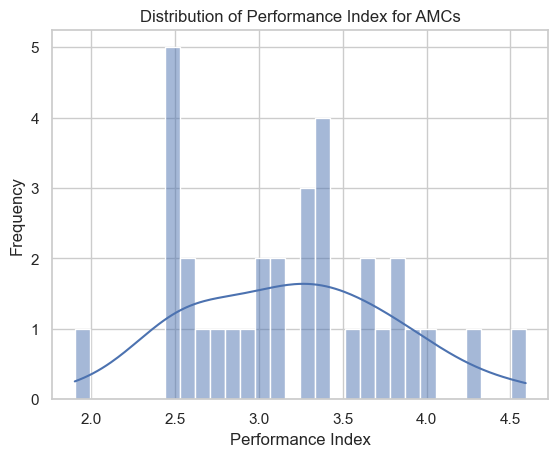

In [137]:
sns.histplot(df_amc['Performance_Index'], bins=30, kde=True)
plt.title('Distribution of Performance Index for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

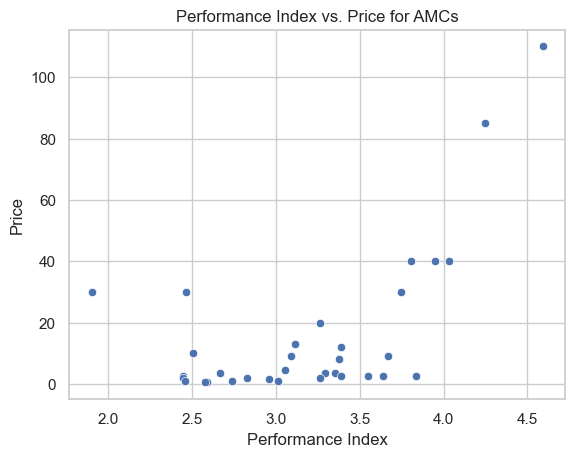

In [138]:
sns.scatterplot(x='Performance_Index', y='price', data=df_amc)
plt.title('Performance Index vs. Price for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Price')
plt.show()


## Starting Linear regression 

In [15]:
# Linear Regression for Central Midfielder
X_cm = df_cm.drop(['name', 'passes-attempted', 'league'], axis=1)
y_cm = df_cm['passes-attempted']

from sklearn.model_selection import train_test_split
X_cm_train, X_cm_test, y_cm_train, y_cm_test = train_test_split(X_cm, y_cm, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model_cm = LinearRegression()
model_cm.fit(X_cm_train, y_cm_train)

# Predictions
y_cm_pred = model_cm.predict(X_cm_test)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Central Midfielders Model:")
print("MAE:", mean_absolute_error(y_cm_test, y_cm_pred))
print("MSE:", mean_squared_error(y_cm_test, y_cm_pred))
print("R^2:", r2_score(y_cm_test, y_cm_pred))


Central Midfielders Model:
MAE: 4.89513903466765
MSE: 39.223500331126985
R^2: 0.7607373971866291


In [16]:
# Linear Regression for Defensive Midfielder
X_dm = df_dm.drop(['name', 'progressive-passes', 'league'], axis=1)
y_dm = df_dm['progressive-passes']

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_dm_train, X_dm_test, y_dm_train, y_dm_test = train_test_split(X_dm, y_dm, test_size=0.2, random_state=42)

# Training the model
from sklearn.linear_model import LinearRegression
model_dm = LinearRegression()
model_dm.fit(X_dm_train, y_dm_train)

# Making predictions
y_dm_pred = model_dm.predict(X_dm_test)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\nDefensive Midfielders Model:")
print("MAE:", mean_absolute_error(y_dm_test, y_dm_pred))
print("MSE:", mean_squared_error(y_dm_test, y_dm_pred))
print("R^2:", r2_score(y_dm_test, y_dm_pred))



Defensive Midfielders Model with 'progressive-passes' as Target:
MAE: 0.8495702327033714
MSE: 1.1786868832767952
R^2: 0.6009938679070445


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df_dm is your DataFrame and it's already loaded with data
X = df_dm[['tackles', 'interceptions', 'blocks', 'passes-attempted']]
y = df_dm['max_price']  # or any other target variable that represents value

# Split the dataset (optional if you just want to fit the model to all data for scoring)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

df_dm['composite_score'] = model.predict(X)

# Sorting by the predicted composite score to identify top players
df_dm_top_10 = df_dm.sort_values(by='composite_score', ascending=False).head(10)

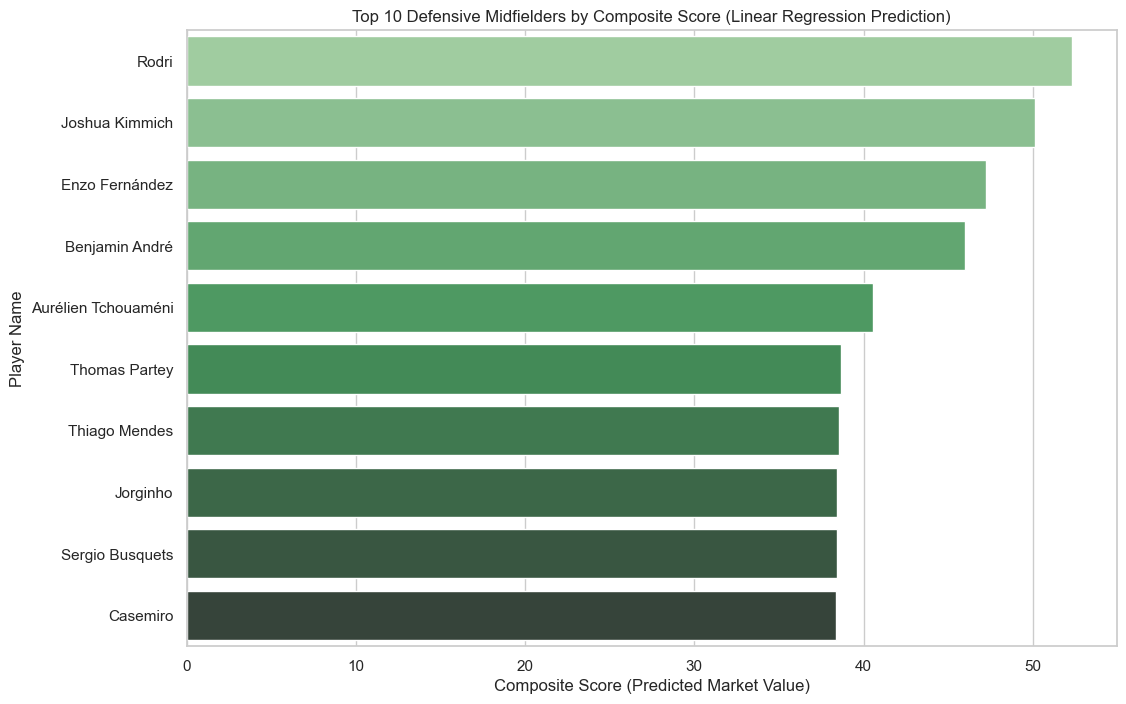

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_dm_top_10, x='composite_score', y='name', palette='Greens_d')
plt.title('Top 10 Defensive Midfielders by Composite Score (Linear Regression Prediction)')
plt.xlabel('Composite Score (Predicted Market Value)')
plt.ylabel('Player Name')
plt.show()

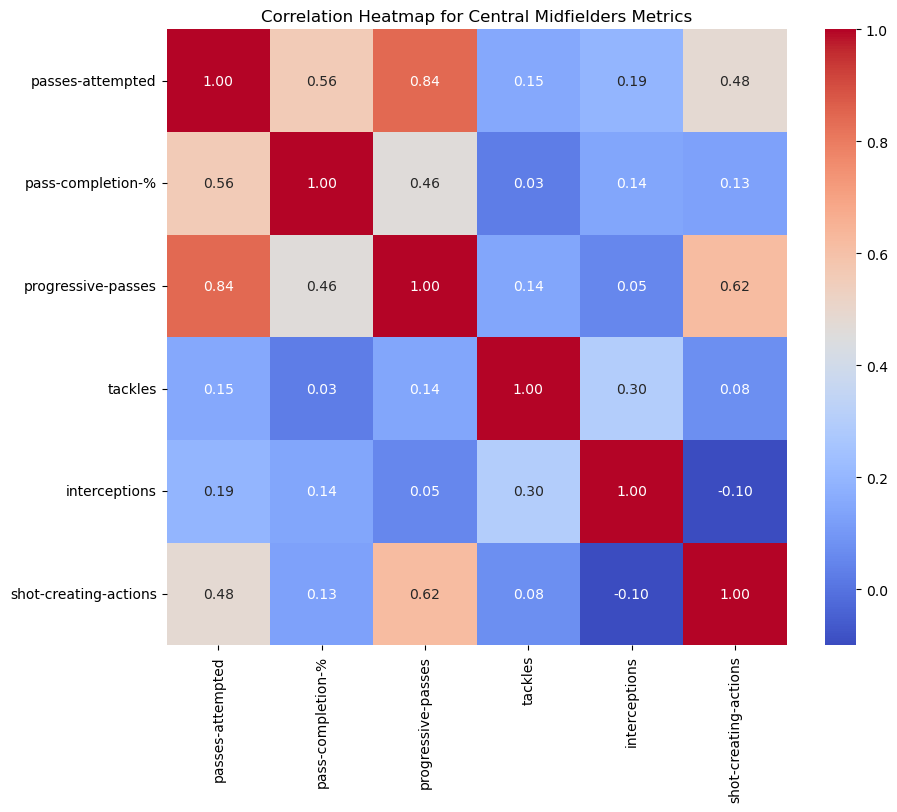

In [21]:
# Central Midfielders - Comparison Across Leagues

plt.figure(figsize=(10, 8))
sns.heatmap(df_cm.drop(['name', 'league'], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Central Midfielders Metrics')
plt.show()